<a href="https://colab.research.google.com/github/shweteekta/Accident_detection/blob/main/accidentdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2




In [2]:
!wget -O data.csv https://raw.githubusercontent.com/shweteekta/Accident_detection/main/imgdata1.csv
!wget -O data1.csv https://raw.githubusercontent.com/shweteekta/Accident_detection/main/imgdata3.csv

--2021-03-09 12:21:01--  https://raw.githubusercontent.com/shweteekta/Accident_detection/main/imgdata1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13878007 (13M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  13.23M  47.6MB/s    in 0.3s    

2021-03-09 12:21:01 (47.6 MB/s) - ‘data.csv’ saved [13878007/13878007]

--2021-03-09 12:21:01--  https://raw.githubusercontent.com/shweteekta/Accident_detection/main/imgdata3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14107541 (13M) [text/p

In [3]:
data=pd.read_csv("data1.csv")

In [4]:
data.head()

,Unnamed: 0,146,180,182,176,197,206,204,214,197.1,172,173,188,208,193,193.1,218,124,69,71,65,72,98,166,235,239,236,223,237,131,147,162,145,157,126,156,178,153,143,149,...,40.2,33,34.2,40.3,51.6,63.6,74.3,85.3,93.3,100.3,107.4,116.8,118.4,115.7,113.5,114.5,114.6,114.7,114.8,113.6,106.3,106.4,101.1,99.6,98.4,96.4,90.5,84.5,81.2,77.6,75.3,81.3,87.2,91.3,94.6,100.4,104.12,109.5,111.7,class
0,0,91,134,38,83,27,35,109,138,172,199,185,120,55,52,40,36,36,35,42,35,47,56,51,29,40,68,51,81,145,175,76,94,106,137,173,179,182,179,181,...,66,78,80,73,74,72,66,61,65,65,61,76,70,69,71,73,73,70,75,75,71,56,50,53,57,62,66,70,73,76,77,80,81,76,65,60,58,50,47,0
1,1,200,201,202,202,203,204,204,202,199,201,205,209,217,213,201,205,215,214,211,215,212,204,200,199,197,220,220,208,199,198,199,200,201,200,201,202,201,200,202,...,107,108,109,110,109,107,105,102,101,101,101,91,93,95,97,100,106,110,113,113,109,108,107,107,107,107,109,110,107,105,104,104,104,104,104,102,100,98,96,0
2,2,111,111,154,203,235,254,254,254,253,252,252,252,250,245,241,241,178,136,137,169,195,197,115,62,140,144,164,230,174,171,135,112,124,167,207,237,250,252,249,...,139,139,136,135,138,141,142,142,141,139,137,141,143,142,144,144,146,146,144,144,145,144,144,142,144,143,144,145,146,145,144,146,147,145,144,143,144,142,141,0
3,3,46,58,65,111,140,124,123,110,77,69,72,95,77,88,90,76,78,109,86,98,90,102,89,84,111,89,110,159,56,56,51,84,139,119,130,106,67,78,69,...,103,101,101,103,104,103,102,103,104,103,102,101,92,93,95,88,90,97,94,89,90,96,88,90,90,98,101,102,102,101,102,102,102,101,102,104,103,102,101,0
4,4,231,232,233,234,234,235,235,235,234,233,236,236,236,236,236,236,236,236,236,230,231,220,225,235,233,231,229,226,231,232,233,234,234,235,235,235,233,233,236,...,156,156,155,160,178,213,206,175,151,135,127,161,166,169,180,182,184,185,191,186,182,182,181,178,177,187,181,174,174,175,174,170,171,172,191,220,193,143,138,0


In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab import files

In [8]:
data.shape

(4979, 785)

In [7]:
del data['Unnamed: 0']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


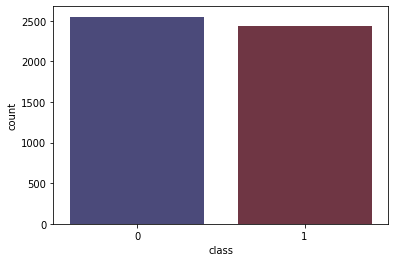

In [9]:
sns.countplot(data['class'],palette = 'icefire')

Text(0.5, 1.0, 'Image 1')

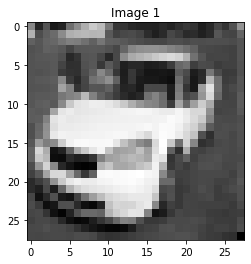

In [10]:
one = data.iloc[0, 1:]
one = one.values.reshape(28,28)
plt.imshow(one, cmap=plt.get_cmap('gray'))
plt.title("Image 1")

In [11]:
X=data.drop("class",axis=1)
y=data['class']

In [12]:
X_scaled=scale(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [14]:
X_train.shape

(3983, 784)

In [15]:
X_test.shape

(996, 784)

## Building CNN (Convolution Neural Network)

In [16]:
batch_size = 512
num_classes = 2
epochs = 1
img_rows, img_cols = 28, 28
X_train = X_train.reshape(3983, 28,28,1)
X_test = X_test.reshape(996, 28,28,1)

In [17]:
X_train.shape

(3983, 28, 28, 1)

In [18]:
X_test.shape

(996, 28, 28, 1)

In [19]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

3983 train samples
996 test samples


In [20]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [21]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200)

Epoch 1/15
20/20 [==============================] - 2s 118ms/step - loss: 0.1550 - accuracy: 0.9405 - val_loss: 0.2194 - val_accuracy: 0.9267
Epoch 2/15
20/20 [==============================] - 2s 115ms/step - loss: 0.1460 - accuracy: 0.9410 - val_loss: 0.2216 - val_accuracy: 0.9217
Epoch 3/15
20/20 [==============================] - 2s 115ms/step - loss: 0.1488 - accuracy: 0.9425 - val_loss: 0.2163 - val_accuracy: 0.9287
Epoch 4/15
20/20 [==============================] - 2s 114ms/step - loss: 0.1341 - accuracy: 0.9488 - val_loss: 0.2044 - val_accuracy: 0.9287
Epoch 5/15
20/20 [==============================] - 2s 114ms/step - loss: 0.1135 - accuracy: 0.9553 - val_loss: 0.2850 - val_accuracy: 0.8986
Epoch 6/15
20/20 [==============================] - 2s 114ms/step - loss: 0.1107 - accuracy: 0.9578 - val_loss: 0.2132 - val_accuracy: 0.9257
Epoch 7/15
20/20 [==============================] - 2s 114ms/step - loss: 0.1014 - accuracy: 0.9623 - val_loss: 0.2122 - val_accuracy: 0.9287
Epoch 

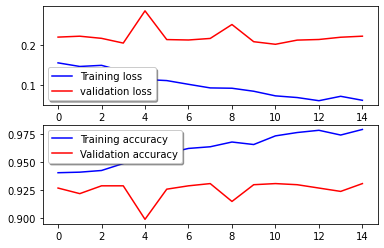

In [26]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
result=[]
print('Test loss:', score[0])
print('Test accuracy:', score[1])
result.append(score[1])

Test loss: 0.2216741293668747
Test accuracy: 0.9307228922843933


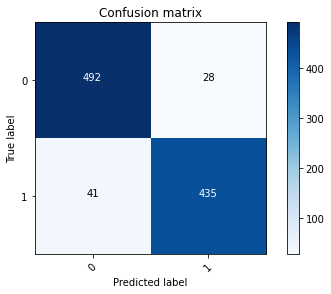

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

## Adaboost Classifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test


In [35]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model2 = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model2.predict(X_test)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
result.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6847389558232931


## XgBoost Classifier

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [38]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
result.append(accuracy)

Accuracy: 78.11%


## Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
result.append(accuracy)

Accuracy: 70.78%


# Comparison of all the models with accuracy

<BarContainer object of 4 artists>

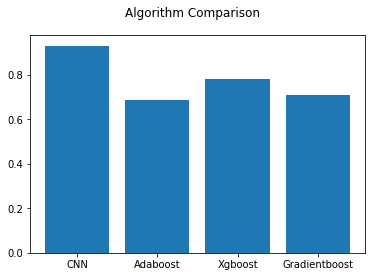

In [43]:
import matplotlib.pyplot as plt
names=["CNN","Adaboost","Xgboost","Gradientboost"]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.bar(names,result)


## Saving the CNN Model 

In [44]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [45]:
model.save("model.h5")

In [46]:
!ls

00027.jpg  data1.csv  model.h5	na.jpg	     sample_data
1790.jpg   data.csv   na1.jpg	resized.jpg  ta1.jpg


### Testing on Images to check the prediction

In [47]:
## Loading the Model
model = keras.models.load_model("model.h5")

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

Download the model file to use in your local program

In [49]:

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loading the Image to test

In [50]:
## Uploading any file in google colab

files.upload()

KeyboardInterrupt: ignored

### Preprocessing the images to make it data ready for providing it for classification

In [51]:
from PIL import Image
import numpy as np
import sys
import os
import csv
#Import required Image library


 ## If you want to display any image here just uncomment the display code and provide the filename as input
#from IPython.display import Image 
 
## display(imgname)
def resizeimg(file):

  #Create an Image Object from an Image
  im = Image.open(file)

  #Display actual image
  ##im.show()

  #Make the new image half the width and half the height of the original image
  resized_im = im.resize((round(im.size[0]*28/im.size[0]), round(im.size[1]*28/im.size[1])))
  return resized_im

def preprocess(file):
    img_file = file
    #img_file = resizeimg(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
   
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    return value


In [52]:
inputimg=resizeimg("00027.jpg")
i=preprocess(inputimg)


In [53]:
i=pd.DataFrame(i)

i=scale(i)

In [54]:
i = i.reshape(1, 28,28,1)

In [55]:
result1=model.predict_classes(i)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:
result1

array([0])

In [57]:
if(result1[0]==0):
  print("Not Accident")
else :
  print("Accident")

Not Accident
